In [13]:
from pynq import Overlay
Overlay("base.bit").download()

from PIL import Image as PIL_Image
%pylab inline 
from IPython.display import clear_output
from pynq.drivers.video import Frame

import numpy as np
import argparse
import cv2


Populating the interactive namespace from numpy and matplotlib


In [14]:
frame_in_w = 640
frame_in_h = 480

videoIn = cv2.VideoCapture(0)
videoIn.set(cv2.CAP_PROP_FRAME_WIDTH, frame_in_w);
videoIn.set(cv2.CAP_PROP_FRAME_HEIGHT, frame_in_h);

print("capture device is open: " + str(videoIn.isOpened()))

ret, frame_vga = videoIn.read()

%matplotlib inline 
from matplotlib import pyplot as plt
import numpy as np

#plt.imshow(frame_vga[:,:,[2,1,0]])
#plt.show()

capture device is open: True


Skin


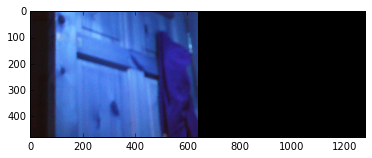

In [15]:
lower = np.array([0, 48, 80], dtype = "uint8")
upper = np.array([20, 255, 255], dtype = "uint8")

converted = cv2.cvtColor(frame_vga, cv2.COLOR_BGR2HSV)
skinMask = cv2.inRange(converted, lower, upper)

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (11, 11))
skinMask = cv2.erode(skinMask, kernel, iterations = 2)
skinMask = cv2.dilate(skinMask, kernel, iterations = 2)

skinMask = cv2.GaussianBlur(skinMask, (3, 3), 0)
skin = cv2.bitwise_and(frame_vga, frame_vga, mask = skinMask)


print("Skin")
plt.imshow(np.hstack([frame_vga, skin]))
plt.show()